In [1]:
import torch 
import torch.nn as nn 
import torchvision.datasets as dsets 
import torchvision.transforms as transforms 
from torch.autograd import Variable 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Hyper Parameters  
input_size = 784
num_classes = 10
num_epochs = 4
batch_size = 100
learning_rate = 0.1
# MNIST Dataset (Images and Labels) 
train_dataset = dsets.MNIST(root ='./data', 
							train = True, 
							transform = transforms.ToTensor(), 
							download = True) 

test_dataset = dsets.MNIST(root ='./data', 
						train = False, 
						transform = transforms.ToTensor()) 

# Dataset Loader (Input Pipline) 
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, 
										batch_size = batch_size, 
										shuffle = True) 

test_loader = torch.utils.data.DataLoader(dataset = test_dataset, 
										batch_size = batch_size, 
										shuffle = False) 

# Model 
class LogisticRegression(nn.Module): 
    def __init__(self, input_size, num_classes): 
        super(LogisticRegression, self).__init__() 
        self.linear = nn.Linear(input_size, num_classes) 
  
    def forward(self, x): 
        out = self.linear(x) 
        return out 
  
  
model = LogisticRegression(input_size, num_classes) 
#model.cuda()
  
# Loss and Optimizer 
# Softmax is internally computed. 
# Set parameters to be updated. 
criterion = nn.CrossEntropyLoss() 
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate) 
  
# Training the Model

for epoch in range(num_epochs): 
    for i, (images, labels) in enumerate(train_loader): 
        images = Variable(images.view(-1, 28 * 28)) 
        labels = Variable(labels) 
  
        # Forward + Backward + Optimize 
        optimizer.zero_grad() 
        outputs = model(images)
        loss = criterion(outputs, labels) 
        loss.backward() 
        optimizer.step() 
  
        if (i + 1) % 100 == 0: 
            print('Epoch: [% d/% d], Step: [% d/% d], Loss: %.4f'
                  % (epoch + 1, num_epochs, i + 1, 
                     len(train_dataset) // batch_size, loss.item())) 
  
# Test the Model 
correct = 0
total = 0
for images, labels in test_loader: 
    images = Variable(images.view(-1, 28 * 28)) 
    outputs = model(images) 
    _, predicted = torch.max(outputs.data, 1) 
    total += labels.size(0) 
    correct += (predicted == labels).sum() 
  
print('Accuracy of the model on the 10000 test images: % d %%' % ( 
            100 * correct / total)) 

Epoch: [ 1/ 4], Step: [ 100/ 600], Loss: 0.6075
Epoch: [ 1/ 4], Step: [ 200/ 600], Loss: 0.5049
Epoch: [ 1/ 4], Step: [ 300/ 600], Loss: 0.4267
Epoch: [ 1/ 4], Step: [ 400/ 600], Loss: 0.4300
Epoch: [ 1/ 4], Step: [ 500/ 600], Loss: 0.5419
Epoch: [ 1/ 4], Step: [ 600/ 600], Loss: 0.5282
Epoch: [ 2/ 4], Step: [ 100/ 600], Loss: 0.5206
Epoch: [ 2/ 4], Step: [ 200/ 600], Loss: 0.2686
Epoch: [ 2/ 4], Step: [ 300/ 600], Loss: 0.4391
Epoch: [ 2/ 4], Step: [ 400/ 600], Loss: 0.3255
Epoch: [ 2/ 4], Step: [ 500/ 600], Loss: 0.3559
Epoch: [ 2/ 4], Step: [ 600/ 600], Loss: 0.5591
Epoch: [ 3/ 4], Step: [ 100/ 600], Loss: 0.3098
Epoch: [ 3/ 4], Step: [ 200/ 600], Loss: 0.3841
Epoch: [ 3/ 4], Step: [ 300/ 600], Loss: 0.2954
Epoch: [ 3/ 4], Step: [ 400/ 600], Loss: 0.3837
Epoch: [ 3/ 4], Step: [ 500/ 600], Loss: 0.2515
Epoch: [ 3/ 4], Step: [ 600/ 600], Loss: 0.5051
Epoch: [ 4/ 4], Step: [ 100/ 600], Loss: 0.2919
Epoch: [ 4/ 4], Step: [ 200/ 600], Loss: 0.2708
Epoch: [ 4/ 4], Step: [ 300/ 600], Loss:

In [2]:
import torch 
print(torch.rand(3,3).cuda())

C:\ProgramData\Anaconda3\lib\site-packages\torch\cuda\__init__.py:116: UserWarning: 
    Found GPU0 GeForce GTX 770 which is of cuda capability 3.0.
    PyTorch no longer supports this GPU because it is too old.
    
  warnings.warn(old_gpu_warn % (d, name, major, capability[1]))


tensor([[0.4371, 0.2173, 0.8846],
        [0.7910, 0.7855, 0.2651],
        [0.6511, 0.8119, 0.8030]], device='cuda:0')


In [3]:
import torch 
print(torch.rand(3,3).cuda())

tensor([[0.2699, 0.7037, 0.3310],
        [0.9438, 0.6428, 0.0544],
        [0.4841, 0.6370, 0.1488]], device='cuda:0')


In [4]:
torch.cuda.device_count()

1

In [5]:
if torch.cuda.is_available():
    print("cuda is available")

cuda is available


In [6]:
optimizer

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.1
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [7]:
total

10000

In [17]:
torch.save(model.state_dict(), 'neuro_model.pkl')

In [8]:
torch.cuda.device_count()

1

In [9]:
labels[3]

tensor(1)

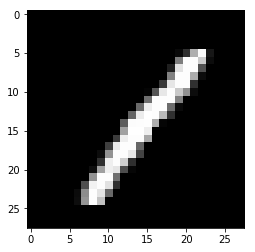

In [11]:
from matplotlib import pyplot as plt 
import numpy as np 
first_image = images[3] 
first_image = np.array(first_image, dtype='float') 
pixels = first_image.reshape((28, 28)) 
plt.imshow(pixels, cmap='gray') 
plt.show() 

In [12]:
import torch 
print(torch.rand(3,3).cuda())

tensor([[0.2585, 0.1076, 0.4681],
        [0.8198, 0.2391, 0.9849],
        [0.2034, 0.7472, 0.2296]], device='cuda:0')


In [13]:
if torch.cuda.is_available():
    print("cuda is available")

cuda is available
